In [1]:
exec(open("../../../python/FNC_init.py").read())

[**Demo %s**](#demo-integration-compare)

First consider the integral 

$$
\int_{-1}^1 \frac{1}{1+4x^2} \, dx = \arctan(2).
$$

In [2]:
f = lambda x: 1 / (1 + 4 * x**2)
exact = arctan(2)

We compare the two spectral integration methods for a range of $n$ values.

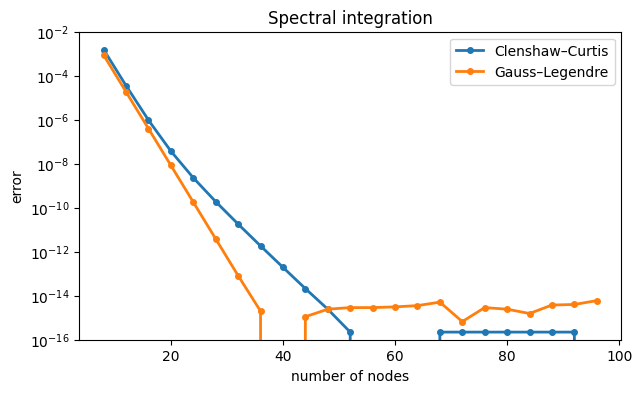

In [3]:
N = range(8, 100, 4)
errCC = zeros(len(N))
errGL = zeros(len(N))
for k, n in enumerate(N):
    errCC[k] = exact - FNC.ccint(f, n)[0]
    errGL[k] = exact - FNC.glint(f, n)[0]

semilogy(N, abs(errCC), "-o", label="Clenshaw–Curtis")
semilogy(N, abs(errGL), "-o", label="Gauss–Legendre")
xlabel("number of nodes"),  ylabel("error"),  ylim(1e-16, 0.01)
legend(),  title("Spectral integration");

(The missing dots are where the error is exactly zero.) Gauss–Legendre does converge faster here, but at something less than twice the rate.

Now we try a more sharply peaked integrand:
 
 $$\int_{-1}^1 \frac{1}{1+16x^2} \, dx = \frac{1}{2}\arctan(4).$$

In [4]:
f = lambda x: 1 / (1 + 16 * x**2)
exact = atan(4) / 2

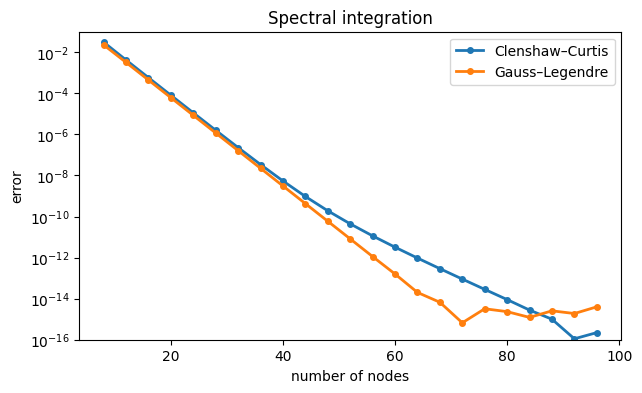

In [5]:
N = range(8, 100, 4)
errCC = zeros(len(N))
errGL = zeros(len(N))
for k, n in enumerate(N):
    errCC[k] = exact - FNC.ccint(f, n)[0]
    errGL[k] = exact - FNC.glint(f, n)[0]

semilogy(N, abs(errCC), "-o", label="Clenshaw–Curtis")
semilogy(N, abs(errGL), "-o", label="Gauss–Legendre")
xlabel("number of nodes"),  ylabel("error"),  ylim(1e-16, 0.1)
legend(),  title("Spectral integration");

The two are very close until about $n=40$, when the Clenshaw–Curtis method slows down.

Now let's compare the spectral performance to that of our earlier adaptive method in `intadapt`. We will specify varying error tolerances and record the error as well as the total number of evaluations of $f$.

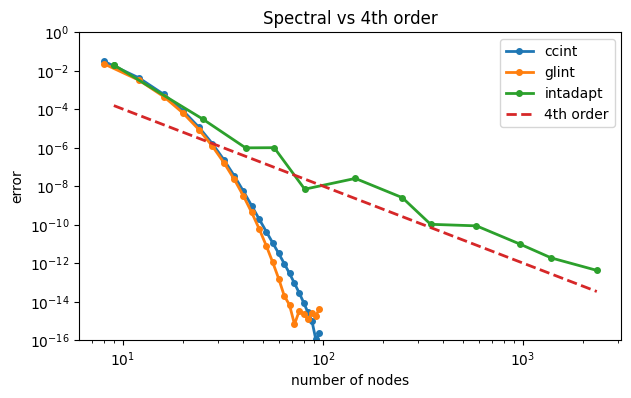

In [6]:
loglog(N, abs(errCC), "-o", label="ccint")
loglog(N, abs(errGL), "-o", label="glint")

tol_ = 1 / 10 ** arange(2, 15)
n = zeros(tol_.size)
errAdapt = zeros(tol_.size)
for k, tol in enumerate(tol_):
    Q, t = FNC.intadapt(f, -1, 1, tol)
    errAdapt[k] = exact - Q
    n[k] = t.size

loglog(n, abs(errAdapt), "-o", label="intadapt")
loglog(n, 1 / (n**4), "--", label="4th order")
xlabel("number of nodes"),  ylabel("error"),  ylim(1e-16, 1)
legend(),  title("Spectral vs 4th order");

At the core of `intadapt` is a fourth-order formula, and the results track that rate closely. For all but the most relaxed error tolerances, both spectral methods are far more efficient than the low-order counterpart. For other integrands, particularly those that vary nonuniformly across the interval, the adaptive method might be more competitive.